In [160]:
import pandas as pd

In [161]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 4820-CFDC

 Directory of c:\Users\Naveen Anand\Downloads\Project -2

21-02-2026  20:17    <DIR>          .
21-02-2026  20:25    <DIR>          ..
20-02-2026  20:34           882,362 AIML Video games.ipynb
14-01-2026  18:40         2,873,121 games.csv
11-02-2026  12:23         4,185,758 merged_data.csv
18-02-2026  14:51    <DIR>          Power bi
14-01-2026  18:40         1,355,781 vgsales.csv
21-02-2026  20:17         3,099,465 video game analysis.pdf
               5 File(s)     12,396,487 bytes
               3 Dir(s)  316,685,885,440 bytes free


In [162]:
vgsales = pd.read_csv(r"C:\Users\Naveen Anand\Downloads\Project -2\vgsales.csv")


In [163]:
games = pd.read_csv(r"C:\Users\Naveen Anand\Downloads\Project -2\games.csv")


#duplicated

In [164]:
games[games.duplicated()]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist


In [165]:
vgsales[vgsales.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


# NUll Values

In [166]:
games.isnull().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [167]:
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [168]:
median_games=(games["Rating"].median())
games["Rating"]=games["Rating"].fillna(median_games)

In [169]:
mode_team=games["Team"].mode()[0]
games["Team"]=games["Team"].fillna(mode_team)

In [170]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1512 non-null   object 
 4   Rating             1512 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [171]:
median_year=int(vgsales["Year"].median())
vgsales["Year"]=vgsales["Year"].fillna(median_year)

In [172]:
mode_Publisher=vgsales["Publisher"].mode()[0]
vgsales["Publisher"]=vgsales["Publisher"].fillna(mode_Publisher)

In [173]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Text

In [174]:
import re

In [175]:
games["Genres"]=games["Genres"].apply(lambda x: re.sub("[^\w\s]",   "" ,   x))

In [176]:
games["Team"]=games["Team"].apply(lambda x: re.sub("[^\w\s]",   "" ,   x))

In [177]:
games["Reviews"]=games["Reviews"].apply(lambda x: re.sub("[^\w\s]",   "" ,   x))

In [178]:
games

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment FromSoftware,4.5,3.9K,3.9K,Adventure RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2.9K,2.9K,Adventure Brawler Indie RPG,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",Nintendo Nintendo EPD Production Group No 3,4.4,4.3K,4.3K,Adventure RPG,The Legend of Zelda: Breath of the Wild is the...,This game is the game that is not CSGO that I ...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015",tobyfox 84,4.2,3.5K,3.5K,Adventure Indie RPG Turn Based Strategy,"A small child falls into the Underground, wher...",soundtrack is tied for 1 with nier automata a...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",Team Cherry,4.4,3K,3K,Adventure Indie Platform,A 2D metroidvania with an emphasis on close co...,this games worldbuilding is incredible with it...,21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",Telltale Games,3.2,94,94,Adventure PointandClick,Back to the Future: The Game is one of Telltal...,Very enjoyable game The story adds onto the mo...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019",Sumo Digital Sega,2.9,264,264,Arcade Racing,Team Sonic Racing combines the best elements o...,jogo morto mas bom not my cup of tea Compared ...,1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",Capcom,3.7,210,210,Brawler RPG,"Set in a huge open world, Dragon’s Dogma: Dark...",Underrated A grandes rasgos es como un MMO per...,1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",Larian Studios,4.1,165,165,Adventure RPG Strategy Tactical Turn Based Str...,"An ancient evil has returned to Baldur's Gate,...",Bu türe bu oyunla girmeye çalışmak hataydı san...,269,79,388,602


In [179]:
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [180]:
def convert_numbers(x):
    x = str(x).strip().upper()

    if x.endswith('K'):
        return int(float(x[:-1]) * 1000)
    else:
        return int(float(x))


In [181]:

games['Plays'] = games['Plays'].apply(convert_numbers)

In [182]:

games['Playing'] = games['Playing'].apply(convert_numbers)

In [183]:

games['Backlogs'] = games['Backlogs'].apply(convert_numbers)

In [184]:
games['Wishlist'] = games['Wishlist'].apply(convert_numbers)

In [185]:
games['Times Listed'] = games['Times Listed'].apply(convert_numbers)

In [186]:
games['Number of Reviews'] = games['Number of Reviews'].apply(convert_numbers)

In [187]:
games

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment FromSoftware,4.5,3900,3900,Adventure RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000,3800,4600,4800
1,1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900,2900,Adventure Brawler Indie RPG,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000,3200,6300,3600
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",Nintendo Nintendo EPD Production Group No 3,4.4,4300,4300,Adventure RPG,The Legend of Zelda: Breath of the Wild is the...,This game is the game that is not CSGO that I ...,30000,2500,5000,2600
3,3,Undertale,"Sep 15, 2015",tobyfox 84,4.2,3500,3500,Adventure Indie RPG Turn Based Strategy,"A small child falls into the Underground, wher...",soundtrack is tied for 1 with nier automata a...,28000,679,4900,1800
4,4,Hollow Knight,"Feb 24, 2017",Team Cherry,4.4,3000,3000,Adventure Indie Platform,A 2D metroidvania with an emphasis on close co...,this games worldbuilding is incredible with it...,21000,2400,8300,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",Telltale Games,3.2,94,94,Adventure PointandClick,Back to the Future: The Game is one of Telltal...,Very enjoyable game The story adds onto the mo...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019",Sumo Digital Sega,2.9,264,264,Arcade Racing,Team Sonic Racing combines the best elements o...,jogo morto mas bom not my cup of tea Compared ...,1500,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",Capcom,3.7,210,210,Brawler RPG,"Set in a huge open world, Dragon’s Dogma: Dark...",Underrated A grandes rasgos es como un MMO per...,1100,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",Larian Studios,4.1,165,165,Adventure RPG Strategy Tactical Turn Based Str...,"An ancient evil has returned to Baldur's Gate,...",Bu türe bu oyunla girmeye çalışmak hataydı san...,269,79,388,602


# Date formatting

In [188]:
games["Release Date"]=pd.to_datetime(games["Release Date"],format="%b %d, %Y", errors='coerce')

In [189]:
median_games=games["Release Date"].median()
games["Release Date"]=games["Release Date"].fillna(median_games)

# merging

In [190]:
games.rename(columns={'Title': 'Name'}, inplace=True)

In [191]:
games

,Unnamed: 0,Name,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022-02-25,Bandai Namco Entertainment FromSoftware,4.5,3900,3900,Adventure RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000,3800,4600,4800
1,1,Hades,2019-12-10,Supergiant Games,4.3,2900,2900,Adventure Brawler Indie RPG,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000,3200,6300,3600
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo Nintendo EPD Production Group No 3,4.4,4300,4300,Adventure RPG,The Legend of Zelda: Breath of the Wild is the...,This game is the game that is not CSGO that I ...,30000,2500,5000,2600
3,3,Undertale,2015-09-15,tobyfox 84,4.2,3500,3500,Adventure Indie RPG Turn Based Strategy,"A small child falls into the Underground, wher...",soundtrack is tied for 1 with nier automata a...,28000,679,4900,1800
4,4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,3000,Adventure Indie Platform,A 2D metroidvania with an emphasis on close co...,this games worldbuilding is incredible with it...,21000,2400,8300,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,2010-12-22,Telltale Games,3.2,94,94,Adventure PointandClick,Back to the Future: The Game is one of Telltal...,Very enjoyable game The story adds onto the mo...,763,5,223,67
1508,1508,Team Sonic Racing,2019-05-21,Sumo Digital Sega,2.9,264,264,Arcade Racing,Team Sonic Racing combines the best elements o...,jogo morto mas bom not my cup of tea Compared ...,1500,49,413,107
1509,1509,Dragon's Dogma,2012-05-22,Capcom,3.7,210,210,Brawler RPG,"Set in a huge open world, Dragon’s Dogma: Dark...",Underrated A grandes rasgos es como un MMO per...,1100,45,487,206
1510,1510,Baldur's Gate 3,2020-10-06,Larian Studios,4.1,165,165,Adventure RPG Strategy Tactical Turn Based Str...,"An ancient evil has returned to Baldur's Gate,...",Bu türe bu oyunla girmeye çalışmak hataydı san...,269,79,388,602


In [192]:
Merge_Video_Game=pd.merge(games,vgsales,on="Name",how="left")

In [193]:
mode_Platform=Merge_Video_Game["Platform"].mode()[0]
Merge_Video_Game["Platform"]=Merge_Video_Game["Platform"].fillna(mode_Platform)

In [194]:
mode_Genre=Merge_Video_Game["Genre"].mode()[0]
Merge_Video_Game["Genre"]=Merge_Video_Game["Genre"].fillna(mode_Genre)

In [195]:
mode_Publisher=Merge_Video_Game["Publisher"].mode()[0]
Merge_Video_Game["Publisher"]=Merge_Video_Game["Publisher"].fillna(mode_Publisher)

In [196]:
median_Rank=Merge_Video_Game["Rank"].median()
Merge_Video_Game["Rank"]=Merge_Video_Game["Rank"].fillna(median_Rank)

In [197]:
median_Year = Merge_Video_Game["Year"].median()
Merge_Video_Game["Year"] = Merge_Video_Game["Year"].fillna(median_Year).astype(int)



In [198]:
median_NA_Sales	=Merge_Video_Game["NA_Sales"].median()
Merge_Video_Game["NA_Sales"]=Merge_Video_Game["NA_Sales"].fillna(median_NA_Sales)

In [199]:
median_EU_Sales	=Merge_Video_Game["EU_Sales"].median()
Merge_Video_Game["EU_Sales"]=Merge_Video_Game["EU_Sales"].fillna(median_EU_Sales)

In [200]:
median_JP_Sales	=Merge_Video_Game["JP_Sales"].median()
Merge_Video_Game["JP_Sales"]=Merge_Video_Game["JP_Sales"].fillna(median_JP_Sales)

In [201]:
median_Global_Sales	=Merge_Video_Game["Global_Sales"].median()
Merge_Video_Game["Global_Sales"]=Merge_Video_Game["Global_Sales"].fillna(median_Global_Sales)

In [202]:
median_Other_Sales	=Merge_Video_Game["Other_Sales"].median()
Merge_Video_Game["Other_Sales"]=Merge_Video_Game["Other_Sales"].fillna(median_Other_Sales)

In [203]:
Merge_Video_Game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         2220 non-null   int64         
 1   Name               2220 non-null   object        
 2   Release Date       2220 non-null   datetime64[ns]
 3   Team               2220 non-null   object        
 4   Rating             2220 non-null   float64       
 5   Times Listed       2220 non-null   int64         
 6   Number of Reviews  2220 non-null   int64         
 7   Genres             2220 non-null   object        
 8   Summary            2219 non-null   object        
 9   Reviews            2220 non-null   object        
 10  Plays              2220 non-null   int64         
 11  Playing            2220 non-null   int64         
 12  Backlogs           2220 non-null   int64         
 13  Wishlist           2220 non-null   int64         
 14  Rank    

In [204]:
Merge_Video_Game


,Unnamed: 0,Name,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,...,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,Elden Ring,2022-02-25,Bandai Namco Entertainment FromSoftware,4.5,3900,3900,Adventure RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,...,1985.0,PS3,2010,Action,Nintendo,0.46,0.30,0.02,0.08,1.05
1,1,Hades,2019-12-10,Supergiant Games,4.3,2900,2900,Adventure Brawler Indie RPG,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,...,1985.0,PS3,2010,Action,Nintendo,0.46,0.30,0.02,0.08,1.05
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo Nintendo EPD Production Group No 3,4.4,4300,4300,Adventure RPG,The Legend of Zelda: Breath of the Wild is the...,This game is the game that is not CSGO that I ...,...,1985.0,PS3,2010,Action,Nintendo,0.46,0.30,0.02,0.08,1.05
3,3,Undertale,2015-09-15,tobyfox 84,4.2,3500,3500,Adventure Indie RPG Turn Based Strategy,"A small child falls into the Underground, wher...",soundtrack is tied for 1 with nier automata a...,...,1985.0,PS3,2010,Action,Nintendo,0.46,0.30,0.02,0.08,1.05
4,4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,3000,Adventure Indie Platform,A 2D metroidvania with an emphasis on close co...,this games worldbuilding is incredible with it...,...,1985.0,PS3,2010,Action,Nintendo,0.46,0.30,0.02,0.08,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,1511,The LEGO Movie Videogame,2014-02-04,WB Games TT Fusion,2.8,184,184,Adventure Puzzle,Join Emmet and an unlikely group of resistance...,Legal Pretty Average Lego Game But It Was My C...,...,3030.0,PS4,2014,Action,Warner Bros. Interactive Entertainment,0.24,0.31,0.01,0.11,0.67
2216,1511,The LEGO Movie Videogame,2014-02-04,WB Games TT Fusion,2.8,184,184,Adventure Puzzle,Join Emmet and an unlikely group of resistance...,Legal Pretty Average Lego Game But It Was My C...,...,3056.0,WiiU,2014,Action,Warner Bros. Interactive Entertainment,0.35,0.23,0.03,0.06,0.66
2217,1511,The LEGO Movie Videogame,2014-02-04,WB Games TT Fusion,2.8,184,184,Adventure Puzzle,Join Emmet and an unlikely group of resistance...,Legal Pretty Average Lego Game But It Was My C...,...,3884.0,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.34,0.13,0.00,0.04,0.51
2218,1511,The LEGO Movie Videogame,2014-02-04,WB Games TT Fusion,2.8,184,184,Adventure Puzzle,Join Emmet and an unlikely group of resistance...,Legal Pretty Average Lego Game But It Was My C...,...,4734.0,PSV,2014,Action,Warner Bros. Interactive Entertainment,0.05,0.26,0.00,0.09,0.41


# DataVisualization

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

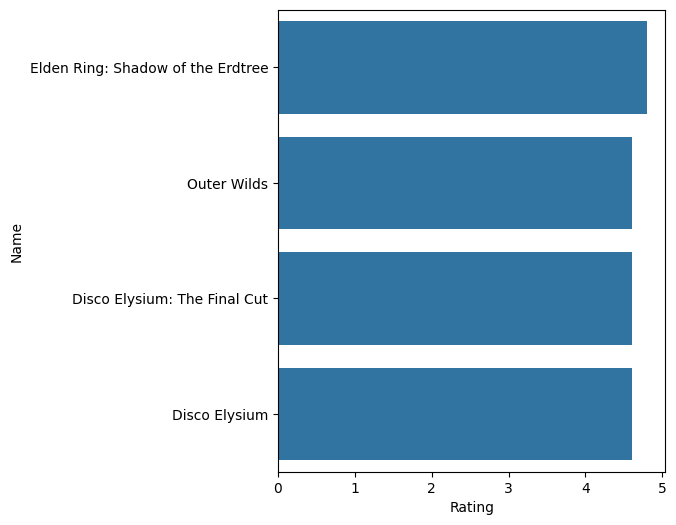

In [206]:
# 1 What are the top-rated games by user reviews?
top_rated_games =games.sort_values(by=["Rating","Number of Reviews"],ascending=False).head(10)
top_rated_games.head(10)


plt.figure(figsize=(5,6))
sns.barplot(x="Rating",y="Name",data=top_rated_games)
plt.show()



In [207]:
# 2 Which developers (Teams) have the highest average ratings?

top_highest_average_ratings =games.groupby("Team")["Rating"].mean().sort_values(ascending=False).head(10)
top_highest_average_ratings .head(10)



Team
07th Expansion                              4.600
Activision FromSoftware                     4.600
Valve                                       4.600
Bay 12 Games Kitfox Games                   4.600
Sony Computer Entertainment FromSoftware    4.600
ZAUM                                        4.600
Konami Digital Entertainment                4.600
Inlusio Interactive IO Interactive          4.600
Mobius Digital Annapurna Interactive        4.575
FromSoftware Sony Computer Entertainment    4.540
Name: Rating, dtype: float64

In [208]:
#  3 What are the most common genres in the dataset?

games.groupby('Genres').size().sort_values(ascending=False)

Genres
Adventure RPG                                      154
Adventure Platform                                 107
Adventure Shooter                                   82
Shooter                                             72
Adventure RPG Turn Based Strategy                   48
                                                  ... 
Real Time Strategy Simulator Strategy                1
Shooter Simulator                                    1
Simulator Strategy Tactical                          1
Simulator Strategy Tactical Turn Based Strategy      1
Strategy Tactical                                    1
Length: 255, dtype: int64

In [209]:
games['Backlogs'] = pd.to_numeric(games['Backlogs'], errors='coerce')
games['Wishlist'] = pd.to_numeric(games['Wishlist'], errors='coerce')


In [210]:
# 4  Which games have the highest backlog compared to wishlist?

games['Backlog_Wishlist_Difference'] = games['Backlogs'] - games['Wishlist']
games.head(10)

,Unnamed: 0,Name,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Backlog_Wishlist_Difference
0,0,Elden Ring,2022-02-25,Bandai Namco Entertainment FromSoftware,4.5,3900,3900,Adventure RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000,3800,4600,4800,-200
1,1,Hades,2019-12-10,Supergiant Games,4.3,2900,2900,Adventure Brawler Indie RPG,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000,3200,6300,3600,2700
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo Nintendo EPD Production Group No 3,4.4,4300,4300,Adventure RPG,The Legend of Zelda: Breath of the Wild is the...,This game is the game that is not CSGO that I ...,30000,2500,5000,2600,2400
3,3,Undertale,2015-09-15,tobyfox 84,4.2,3500,3500,Adventure Indie RPG Turn Based Strategy,"A small child falls into the Underground, wher...",soundtrack is tied for 1 with nier automata a...,28000,679,4900,1800,3100
4,4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,3000,Adventure Indie Platform,A 2D metroidvania with an emphasis on close co...,this games worldbuilding is incredible with it...,21000,2400,8300,2300,6000
5,5,Minecraft,2011-11-18,Mojang Studios,4.3,2300,2300,Adventure Simulator,Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it Unfortunately...,33000,1800,1100,230,870
6,6,Omori,2020-12-25,OMOCAT PLAYISM,4.2,1600,1600,Adventure Indie RPG Turn Based Strategy,A turn-based surreal horror RPG in which a chi...,The best game Ive played in my life omori is a...,7200,1100,4500,3800,700
7,7,Metroid Dread,2021-10-07,Nintendo MercurySteam,4.3,2100,2100,Adventure Platform,Join intergalactic bounty hunter Samus Aran in...,Have only been a Metroid fan for couple of yea...,9200,759,3400,3300,100
8,8,Among Us,2018-06-15,InnerSloth,3.0,867,867,Indie Strategy,Join your crew-mates in a multiplayer game of ...,its a solid party game im bad at lying though ...,25000,470,776,126,650
9,9,NieR: Automata,2017-02-23,PlatinumGames Square Enix,4.3,2900,2900,Brawler RPG,"NieR: Automata tells the story of androids 2B,...",Holy shit im carrying the weight of the wooooo...,18000,1100,6200,3600,2600


Release_Year
1980    1
1982    1
1985    1
1986    4
1987    3
Name: count, dtype: int64

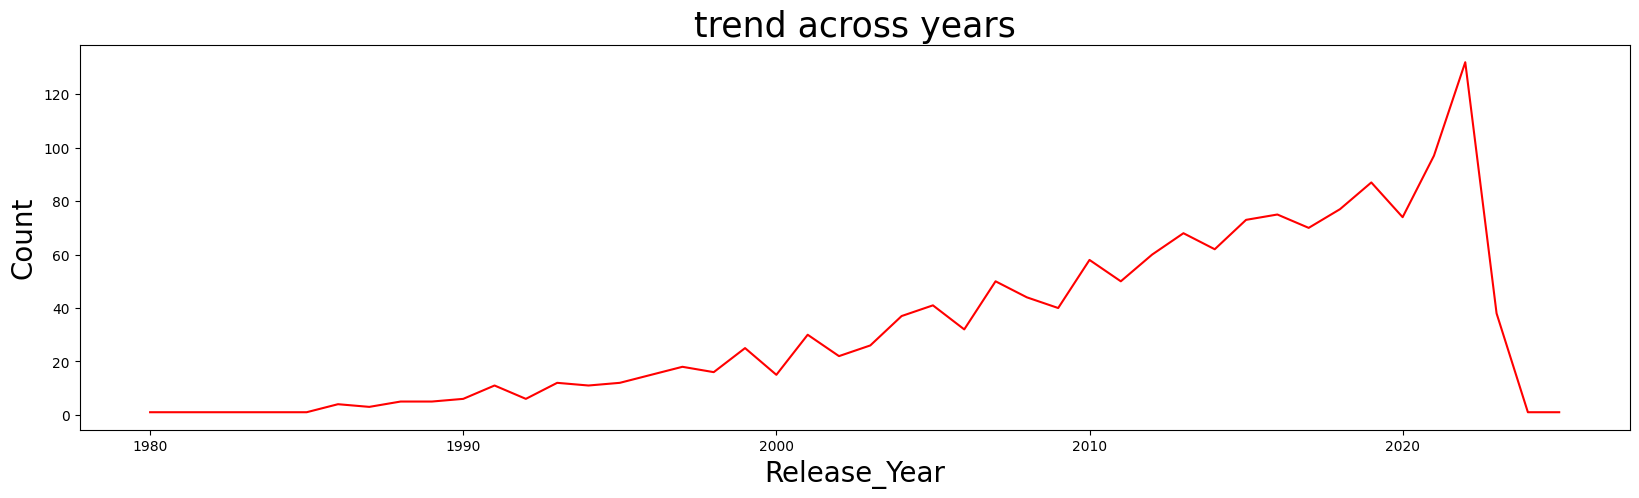

In [211]:

# 5 What is the game release trend across years?
games['Release_Year'] = games['Release Date'].dt.year

yearly_releases = games['Release_Year'].value_counts().sort_index()

yearly_releases.head()

yearly_releases.plot(kind="line",figsize=(20,5),color="red")

plt.xlabel("Release_Year", size=20)
plt.ylabel("Count",size=20)

plt.title("trend across years",size=25)

yearly_releases.head()




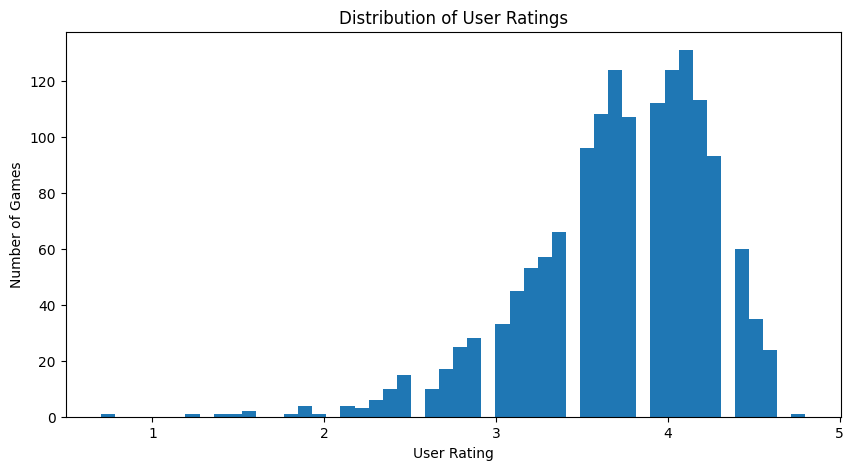

In [212]:
# 6  What is the distribution of user ratings?
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

games['Rating'].plot(kind='hist', bins=50)

plt.xlabel("User Rating")
plt.ylabel("Number of Games")
plt.title("Distribution of User Ratings")

plt.show()

In [213]:
# 7 What are the top 10 most wishlisted games?

top_10_most_wishlisted=games.sort_values(by="Wishlist",ascending=False)
top_10_most_wishlisted.head(10)


,Unnamed: 0,Name,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Backlog_Wishlist_Difference,Release_Year
972,972,The Legend of Zelda: Tears of the Kingdom,2023-05-12,Nintendo Nintendo EPD Production Group No 3,3.8,581,581,Adventure RPG,The Legend of Zelda: Tears of the Kingdom is t...,,72,6,1600,5400,-3800,2023
326,326,Elden Ring,2022-02-25,Bandai Namco Entertainment FromSoftware,4.5,3900,3900,Adventure RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000,3800,4600,4800,-200,2022
0,0,Elden Ring,2022-02-25,Bandai Namco Entertainment FromSoftware,4.5,3900,3900,Adventure RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000,3800,4600,4800,-200,2022
776,776,Elden Ring,2022-02-25,Bandai Namco Entertainment FromSoftware,4.5,3900,3900,Adventure RPG,"Elden Ring is a fantasy, action and open world...",By far one of the most disappointing game Ive ...,17000,3800,4600,4800,-200,2022
6,6,Omori,2020-12-25,OMOCAT PLAYISM,4.2,1600,1600,Adventure Indie RPG Turn Based Strategy,A turn-based surreal horror RPG in which a chi...,The best game Ive played in my life omori is a...,7200,1100,4500,3800,700,2020
332,332,Omori,2020-12-25,OMOCAT PLAYISM,4.2,1600,1600,Adventure Indie RPG Turn Based Strategy,A turn-based surreal horror RPG in which a chi...,The best game Ive played in my life omori is a...,7200,1100,4500,3800,700,2020
782,782,Omori,2020-12-25,OMOCAT PLAYISM,4.2,1600,1600,Adventure Indie RPG Turn Based Strategy,A turn-based surreal horror RPG in which a chi...,The best game Ive played in my life omori is a...,7200,1100,4500,3800,700,2020
31,31,NieR Replicant ver.1.22474487139...,2021-04-22,Toylogic Square Enix,4.2,1500,1500,Adventure RPG,NieR Replicant ver.1.22474487139... is an upda...,Not as good as automata but still slaps Tem do...,6700,880,4100,3700,400,2021
357,357,NieR Replicant ver.1.22474487139...,2021-04-22,Toylogic Square Enix,4.2,1500,1500,Adventure RPG,NieR Replicant ver.1.22474487139... is an upda...,Not as good as automata but still slaps Tem do...,6700,880,4100,3700,400,2021
807,807,NieR Replicant ver.1.22474487139...,2021-04-22,Toylogic Square Enix,4.2,1500,1500,Adventure RPG,NieR Replicant ver.1.22474487139... is an upda...,Not as good as automata but still slaps Tem do...,6700,880,4100,3700,400,2021


In [214]:
# 8  What’s the average number of plays per genre?
average_plays_per_genre = games.groupby('Genres')['Plays'].mean().sort_values(ascending=False)
average_plays_per_genre.head()

Genres
Platform Puzzle Shooter                  21750.000000
Adventure Platform Puzzle Shooter        19242.857143
Adventure Indie Platform RPG Strategy    18000.000000
Arcade Indie Platform Shooter            18000.000000
Indie Racing Sport                       17000.000000
Name: Plays, dtype: float64

In [215]:
# 9  Which developer studios are the most productive and impactful?

studio_stats = games.groupby('Team').agg({
    "Name":"count",
    'Rating':'mean'
}).rename(columns={
    'Name': 'Games Released',
    'Rating': 'Avg Rating'
}).sort_values(by=['Games Released','Avg Rating'], ascending=[False,False])


print(studio_stats.head(10))

                                        Games Released  Avg Rating
Team                                                              
Capcom                                              36    3.694444
Square Enix                                         31    3.941935
Nintendo Nintendo EAD                               19    3.842105
Nintendo                                            19    3.810526
Nintendo Game Freak                                 19    3.805263
Nintendo EAD Nintendo                               16    3.887500
Intelligent Systems Co Ltd Nintendo                 14    3.550000
Sega Sonic Team                                     11    2.754545
HAL Laboratory Nintendo                             10    3.900000
Ubisoft Montreal Ubisoft Entertainment              10    3.350000


In [216]:
# 10  Which region generates the most game sales?

region_sales = vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
top_region = region_sales.idxmax()
top_value = region_sales.max()

print("Top Region:", top_region)
print("Sales:", top_value)





Top Region: NA_Sales
Sales: 4392.950000000001


In [217]:
# 11 What are the best-selling platforms?
platform_sales = vgsales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales



Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

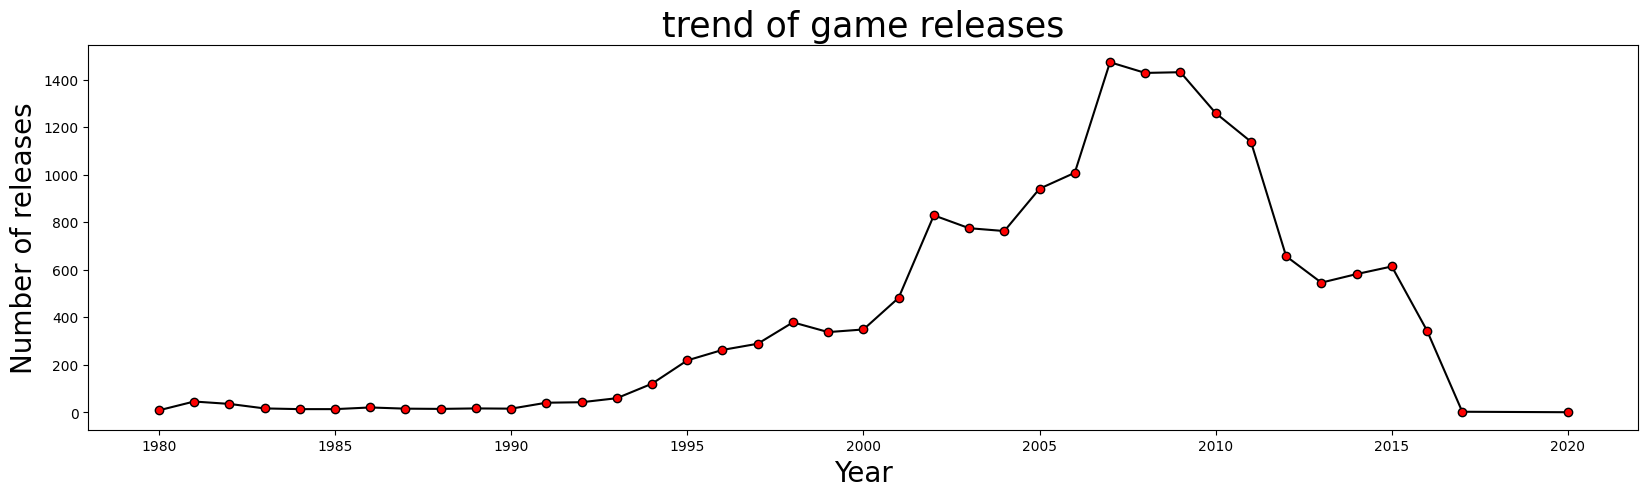

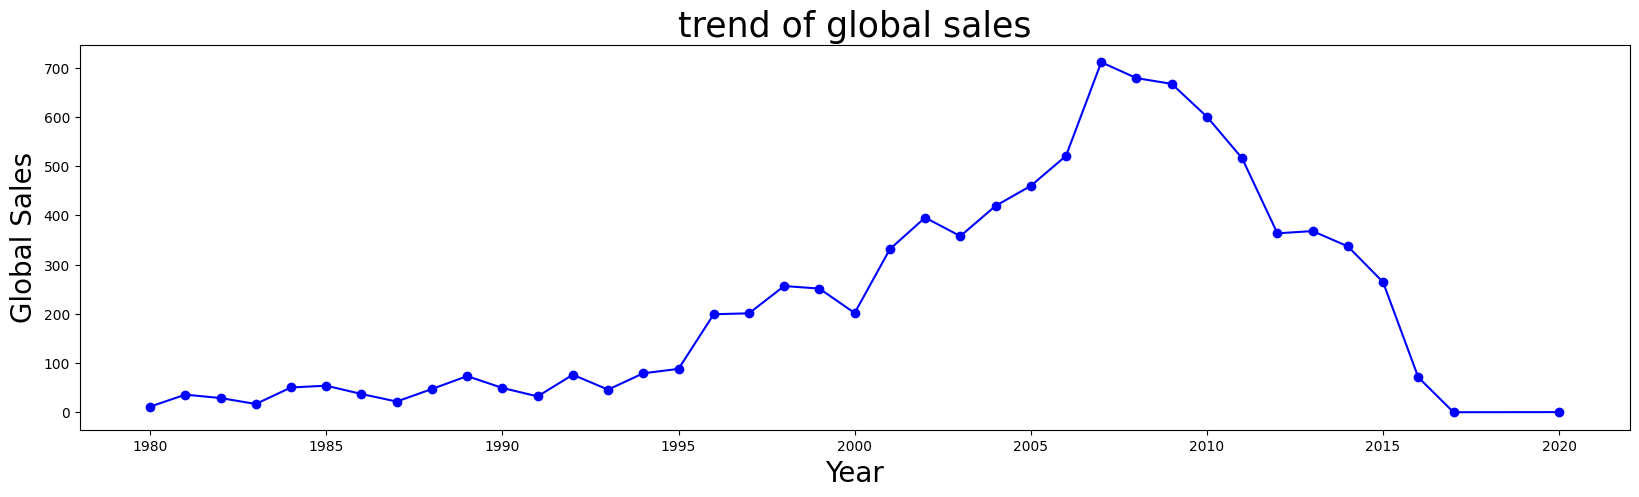

In [218]:
# 12 What’s the trend of game releases and sales over years?

releases_per_year =vgsales['Year'].value_counts().sort_index()
releases_per_year.plot(kind="line",figsize=(20,5),color="black",marker=".", markerfacecolor="red", markersize=12)

plt.xlabel("Year", size=20)
plt.ylabel("Number of releases",size=20)

plt.title("trend of game releases",size=25)

plt.show()

yearly_sales_vgsales = vgsales.groupby('Year')['Global_Sales'].sum()

yearly_sales_vgsales.plot(kind="line",figsize=(20,5),color="blue",marker="o")

plt.xlabel("Year", size=20)
plt.ylabel("Global Sales",size=20)

plt.title("trend of global sales",size=25)

plt.show()

In [219]:
# 13 🏢 Who are the top publishers by sales?

top_sales_publishers = vgsales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

print("Top 10 Publishers by Global Sales:")
top_sales_publishers.head(10)

Top 10 Publishers by Global Sales:


Publisher
Nintendo                        1786.56
Electronic Arts                 1125.20
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64

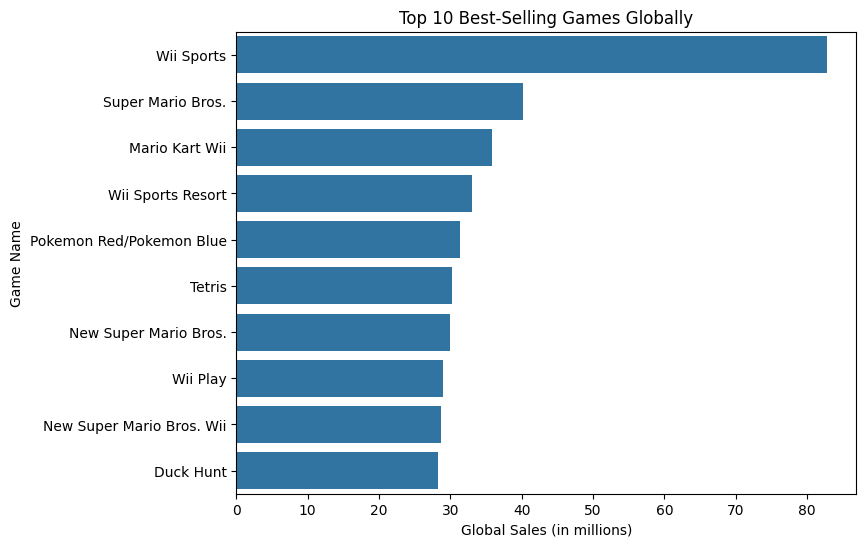

In [220]:
#14 Which games are the top 10 best-sellers globally?

top_10_best_sellers = vgsales.sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(
    x="Global_Sales",
    y="Name",
    data=top_10_best_sellers
)

plt.title("Top 10 Best-Selling Games Globally")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Game Name")
plt.show()

In [221]:
#15 How do regional sales compare for specific platforms?

regional_sales_by_platform = vgsales.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

print("Regional Sales by Platform:")
regional_sales_by_platform

Regional Sales by Platform:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,90.60,5.47,0.00,0.91
3DO,0.00,0.00,0.10,0.00
3DS,78.87,58.52,97.35,12.63
DC,5.43,1.69,8.56,0.27
DS,390.71,194.65,175.57,60.53
GB,114.32,47.82,85.12,8.20
GBA,187.54,75.25,47.33,7.73
GC,133.46,38.71,21.58,5.18
GEN,19.27,5.52,2.67,0.89


<Figure size 2000x1000 with 0 Axes>

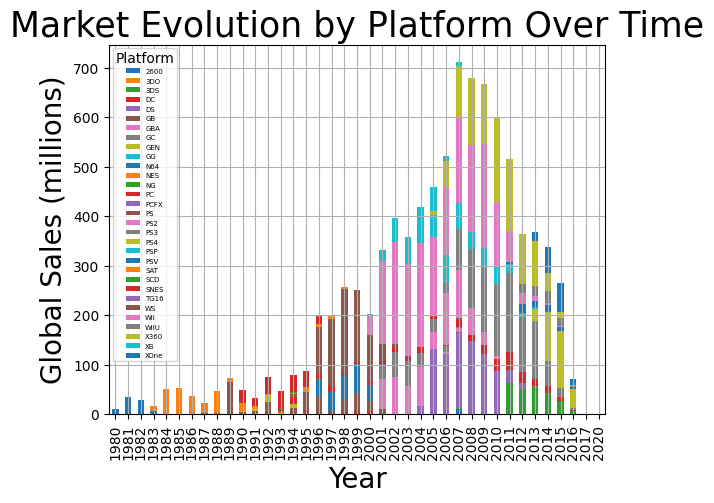

In [222]:
#  16 How has the market evolved by platform over time?

vgsales_clean = vgsales.dropna(subset=['Year', 'Platform'])


vgsales_clean['Year'] = vgsales_clean['Year'].astype(int)


platform_over_time = vgsales_clean.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()


platform_pivot = platform_over_time.pivot(index='Year', columns='Platform', values='Global_Sales').fillna(0)


plt.figure(figsize=(20,10))
platform_pivot.plot(kind='bar', stacked=True, linewidth=2)


plt.xlabel("Year", fontsize=20)
plt.ylabel("Global Sales (millions)", fontsize=20)
plt.title("Market Evolution by Platform Over Time", fontsize=25)
plt.legend(title='Platform', fontsize=5)
plt.grid(True)
plt.show()

In [223]:
# 17  What are the regional genre preferences?

regional_genre_sales = vgsales.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
print("Regional Genre Preferences:")
regional_genre_sales.head()



Regional Genre Preferences:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59


Yearly sales change per region:
        NA_Sales  EU_Sales  JP_Sales  Other_Sales
Year                                             
1980.0      0.00      0.00      0.00         0.00
1981.0     22.81      1.29      0.00         0.20
1982.0     -6.48     -0.31      0.00        -0.01
1983.0    -19.16     -0.85      8.10        -0.17
1984.0     25.52      1.30      6.17         0.56


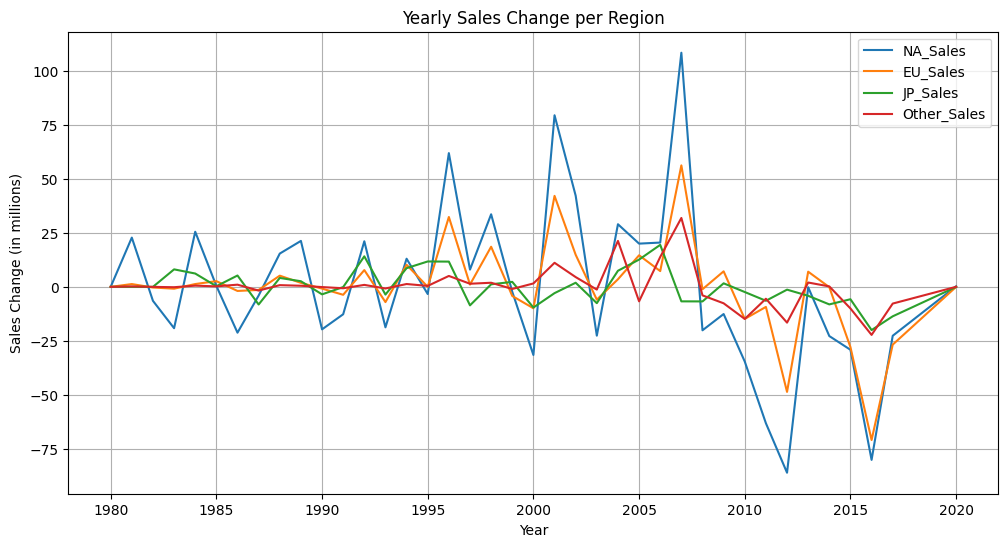

In [224]:
#   18 What’s the yearly sales change per region?

vgsales = vgsales[vgsales['Year'] > 0]

Yearly_sales = (
vgsales
.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
.sum()
.sort_index()
)

Yearly_change = Yearly_sales.diff().fillna(0)

print("Yearly sales change per region:")
print(Yearly_change.head())

Yearly_change.plot(kind='line', figsize=(12,6))
plt.title("Yearly Sales Change per Region")
plt.xlabel("Year")
plt.ylabel("Sales Change (in millions)")
plt.grid(True)
plt.show()

In [225]:
# 19 What is the average sales per publisher?

average_sales_per_publisher = vgsales.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)
print("Average Sales per Publisher:")
average_sales_per_publisher.head(10)


Average Sales per Publisher:


Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.541337
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Valve                                 1.740000
Hello Games                           1.600000
Sony Computer Entertainment Europe    1.592667
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64

In [226]:
# 20  What are the top 5 best-selling games per platform?
top_5_games=vgsales.groupby(['Platform','Name'])['Global_Sales'].sum().reset_index()
top_5_games_per_platform = top_5_games.groupby('Platform').apply(lambda x: x.nlargest(5, 'Global_Sales')).reset_index(drop=True)
print("Top 5 Best-Selling Games for each Platform:")
display(top_5_games_per_platform)




Top 5 Best-Selling Games for each Platform:


C:\Users\Naveen Anand\AppData\Local\Temp\ipykernel_27332\148764504.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_games_per_platform = top_5_games.groupby('Platform').apply(lambda x: x.nlargest(5, 'Global_Sales')).reset_index(drop=True)


,Platform,Name,Global_Sales
0,2600,Pac-Man,7.81
1,2600,Pitfall!,4.50
2,2600,Asteroids,4.31
3,2600,Missile Command,2.76
4,2600,Space Invaders,2.53
...,...,...,...
137,XOne,Call of Duty: Black Ops 3,7.30
138,XOne,Call of Duty: Advanced Warfare,5.13
139,XOne,Grand Theft Auto V,5.08
140,XOne,Halo 5: Guardians,4.26


In [227]:
# 21 Which game genres generate the most global sales?

global_sales_by_genre = Merge_Video_Game.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print("Game genres generating the most global sales:")
print(global_sales_by_genre.head(10))






Game genres generating the most global sales:
Genre
Action          1880.31
Platform         643.09
Shooter          532.48
Role-Playing     396.83
Sports           279.60
Racing           198.01
Puzzle           135.33
Misc             133.87
Fighting          87.06
Adventure         65.04
Name: Global_Sales, dtype: float64


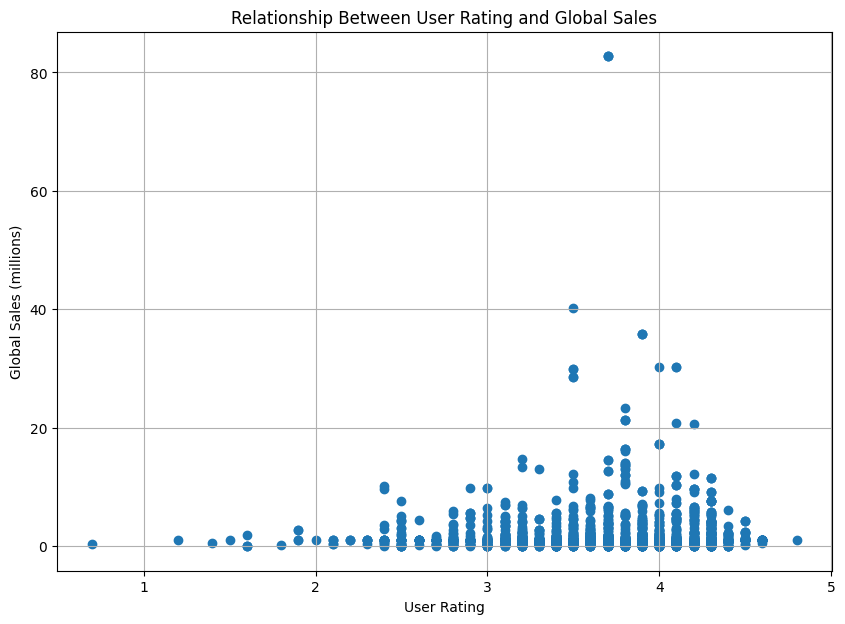

0.04101381724740959


In [228]:
# 22  How does user rating affect global sales?

rating_sales = Merge_Video_Game.dropna(subset=['Rating', 'Global_Sales'])



plt.figure(figsize=(10, 7))
plt.scatter(rating_sales['Rating'], rating_sales['Global_Sales'])

plt.xlabel("User Rating")
plt.ylabel("Global Sales (millions)")
plt.title("Relationship Between User Rating and Global Sales")
plt.grid(True)

plt.show()

correlation = rating_sales['Rating'].corr(rating_sales['Global_Sales'])
print(correlation)


In [229]:
# 23 Which platforms have the most games with high ratings (e.g., above 4)?

high_rated_platforms = Merge_Video_Game[Merge_Video_Game['Rating'] > 4].groupby('Platform').size().sort_values(ascending=False)
print("Platforms with the most games with high ratings:")
print(high_rated_platforms.head(10))

Platforms with the most games with high ratings:
Platform
PS3     312
PS2      37
PC       35
X360     30
PS4      22
PS       21
DS       20
SNES     19
GC       16
Wii      12
dtype: int64


             Global_Sales  Releases
ReleaseYear                        
1980                 9.03         2
1982                 1.65         1
1985                45.31         2
1986                15.94         5
1987                 6.24         3


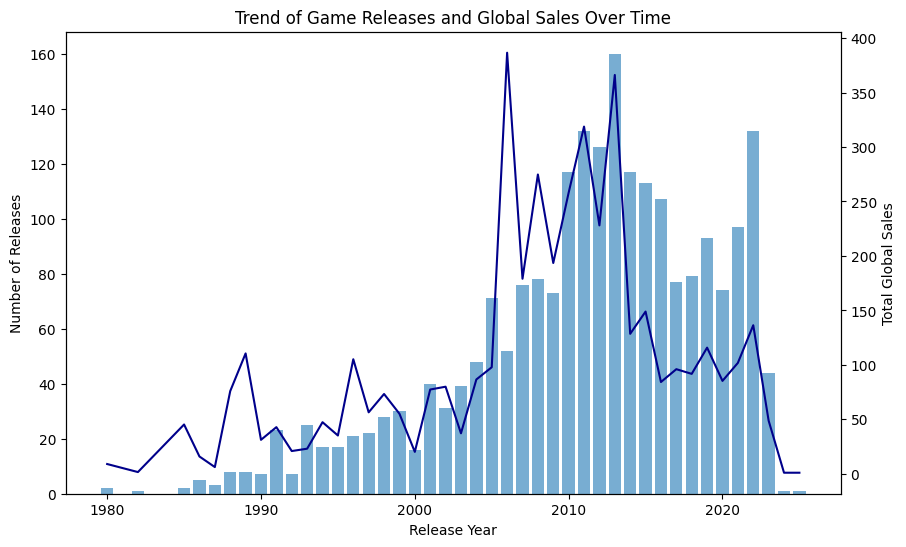

In [230]:
 #24 What’s the trend of releases and sales over time?

Merge_Video_Game['ReleaseYear'] = Merge_Video_Game['Release Date'].dt.year
Merge_Video_Game = Merge_Video_Game.dropna(subset=['ReleaseYear'])

Merge_Video_Game['ReleaseYear'] = Merge_Video_Game['ReleaseYear'].astype(int)

# Group by ReleaseYear
yearly_trend = Merge_Video_Game.groupby('ReleaseYear').agg({
    'Global_Sales': 'sum'
})

# Count number of releases
yearly_trend['Releases'] = Merge_Video_Game.groupby('ReleaseYear').size()

yearly_trend = yearly_trend.sort_index()

print(yearly_trend.head())


fig, ax1 = plt.subplots(figsize=(10,6))

# Bar for releases
ax1.bar(yearly_trend.index, yearly_trend['Releases'], alpha=0.6)
ax1.set_xlabel("Release Year")
ax1.set_ylabel("Number of Releases")

# Line for sales
ax2 = ax1.twinx()
ax2.plot(yearly_trend.index, yearly_trend['Global_Sales'], color='darkblue')
ax2.set_ylabel("Total Global Sales")

plt.title("Trend of Game Releases and Global Sales Over Time")
plt.show()

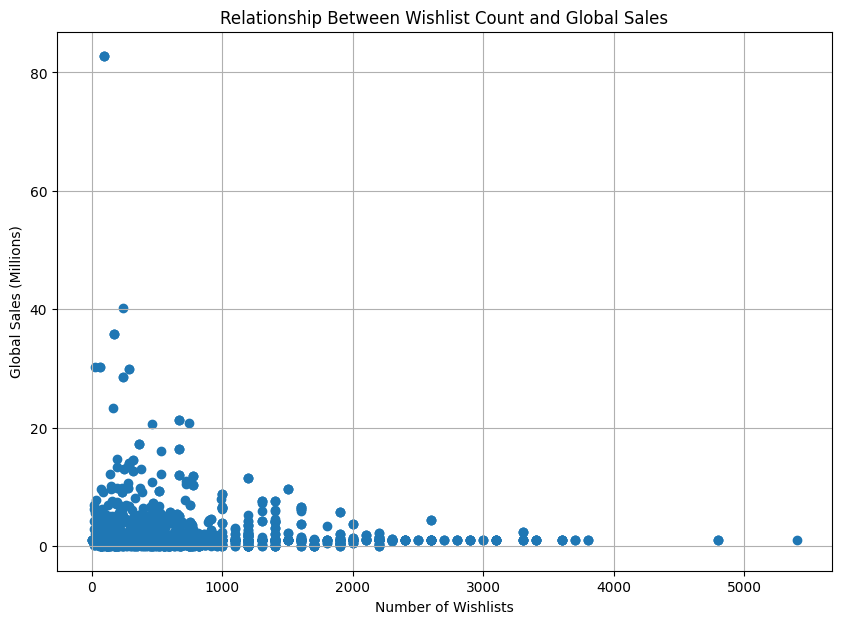

In [231]:
# 25  🧍 Do highly wishlisted games lead to more sales?

plt.figure(figsize=(10, 7))
plt.scatter(Merge_Video_Game['Wishlist'], Merge_Video_Game['Global_Sales'])

plt.xlabel("Number of Wishlists")
plt.ylabel("Global Sales (Millions)")
plt.title("Relationship Between Wishlist Count and Global Sales")
plt.grid(True)


correlation = Merge_Video_Game['Wishlist'].corr(Merge_Video_Game['Global_Sales'])



In [232]:
# 26🎮 Which genres have the highest engagement but lowest sales?

#  Step 1: Create Total Engagement
Merge_Video_Game['Total_Engagement'] = (
    Merge_Video_Game['Plays'].fillna(0) +
    Merge_Video_Game['Wishlist'].fillna(0) +
    Merge_Video_Game['Backlogs'].fillna(0)
)

# Step 2: Split multiple genres
Merge_Video_Game['Genres'] = Merge_Video_Game['Genres'].str.split(',')

# Step 3: Explode (one row per genre)
exploded_df = Merge_Video_Game.explode('Genres')



# Step 4: Group by Genres
genre_summary = exploded_df.groupby('Genres').agg(
    Total_Engagement=('Total_Engagement', 'sum'),
    Global_Sales=('Global_Sales', 'sum')
).reset_index()

# Step 5: Sort by High Engagement & Low Sales
genre_summary = genre_summary.sort_values(
    ['Total_Engagement', 'Global_Sales'],
    ascending=[False, True]
)

print(genre_summary.head(10))

                                Genres  Total_Engagement  Global_Sales
108                      Adventure RPG           2890154        397.61
128                  Adventure Shooter           1824400        339.64
84                  Adventure Platform           1744914        570.82
243                            Shooter           1690712        402.23
17                   Adventure Brawler            932616        107.50
228                        RPG Shooter            710269         99.13
131                Adventure Simulator            704630        104.27
109              Adventure RPG Shooter            674412        101.69
121  Adventure RPG Turn Based Strategy            627276         76.44
215                           Platform            437927        164.10


            Rating  Wishlist  Backlogs
Rating    1.000000  0.472831  0.450468
Wishlist  0.472831  1.000000  0.776334
Backlogs  0.450468  0.776334  1.000000


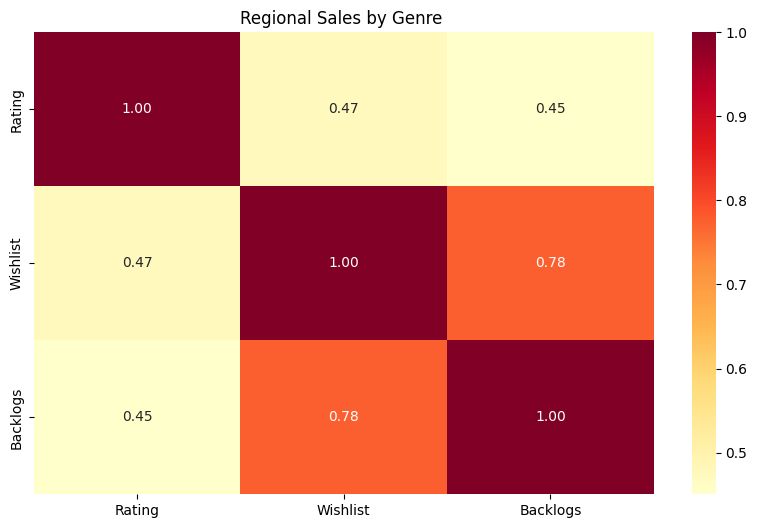

In [233]:
# 27

cols = ["Rating", "Wishlist", "Backlogs"]
Merge_Video_Game_clean = Merge_Video_Game[cols].dropna()
df_corr = Merge_Video_Game_clean.corr(method="pearson")
print(df_corr)


# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Regional Sales by Genre ")
plt.show()


In [234]:
import pandas as pd

merged_data = pd.read_csv("merged_data.csv")

cols = ['Genres', 'Times Listed', 'Number of Reviews']
engagement_df = merged_data[cols].copy()

# Clean numeric columns
engagement_df['Times Listed'] = pd.to_numeric(
    engagement_df['Times Listed'].astype(str).str.replace(',', ''),
    errors='coerce'
)

engagement_df['Number of Reviews'] = pd.to_numeric(
    engagement_df['Number of Reviews'].astype(str).str.replace(',', ''),
    errors='coerce'
)

# Drop missing rows
engagement_df = engagement_df.dropna(subset=cols)

# Split genres correctly (ADJUST if needed)
engagement_df['Genres'] = engagement_df['Genres'].str.split(r',\s*')

# Explode genres
engagement_df = engagement_df.explode('Genres')

# Remove blanks
engagement_df = engagement_df[engagement_df['Genres'].str.strip() != ""]

# Group
genre_engagement = (
    engagement_df.groupby('Genres')
    .agg(
        Avg_Times_Listed=('Times Listed','mean'),
        Avg_Reviews=('Number of Reviews','mean'),
        Total_Games=('Genres','count')
    )
    .sort_values(by='Avg_Times_Listed', ascending=False)
)

print(genre_engagement.head(10))

                                      Avg_Times_Listed  Avg_Reviews  \
Genres                                                                
Adventure Brawler RPG Simulator            2149.000000  2149.000000   
Adventure Brawler Shooter Strategy         2100.000000  2100.000000   
Arcade Indie Platform Shooter              1900.000000  1900.000000   
Adventure Tactical                         1900.000000  1900.000000   
Adventure Platform Puzzle Shooter          1898.000000  1898.000000   
Adventure Brawler Indie RPG                1696.833333  1696.833333   
Adventure Simulator                        1600.310345  1600.310345   
Brawler Shooter                            1580.000000  1580.000000   
Platform Puzzle Shooter                    1574.500000  1574.500000   
Adventure RPG Simulator Visual Novel       1438.250000  1438.250000   

                                      Total_Games  
Genres                                             
Adventure Brawler RPG Simulator            

In [235]:
#29  What are the top-performing combinations of Genre + Platform?



genre_platform_sales = Merge_Video_Game.groupby(['Genre', 'Platform']).agg({'Global_Sales': 'sum'}).reset_index()

top_combinations = genre_platform_sales.sort_values(by='Global_Sales', ascending=False)
print(top_combinations.head(10))


        Genre Platform  Global_Sales
10     Action      PS3       1159.81
170    Sports      Wii        251.01
147   Shooter     X360        220.97
18     Action     X360        173.85
141   Shooter      PS3        147.47
9      Action      PS2        143.35
85   Platform      Wii        137.02
111    Racing      Wii        107.94
75   Platform      NES        107.10
69   Platform       DS        105.32


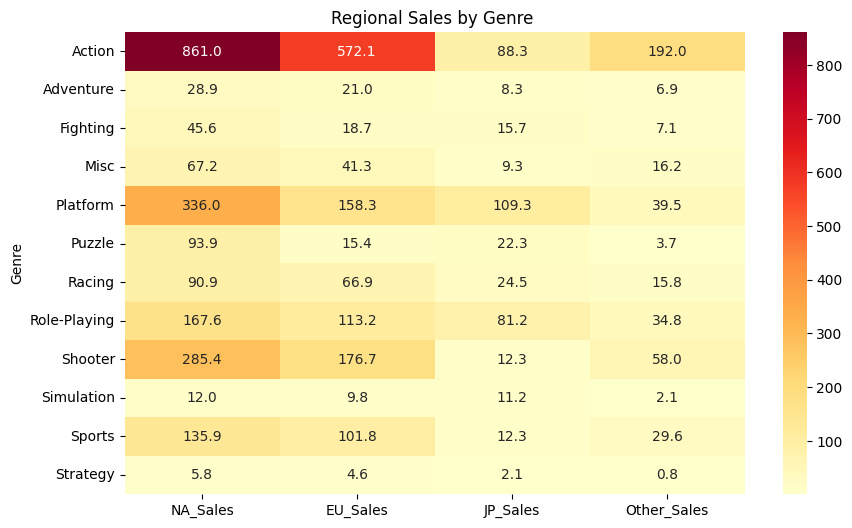

In [236]:
#30

genre_sales = Merge_Video_Game.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(genre_sales, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Regional Sales by Genre ")
plt.show()

In [237]:
pip show mysql-connector-python


Name: mysql-connector-python
Version: 9.5.0
Summary: A self-contained Python driver for communicating with MySQL servers, using an API that is compliant with the Python Database API Specification v2.0 (PEP 249).
Home-page: 
Author: Oracle and/or its affiliates
Author-email: 
License: GNU GPLv2 (with FOSS License Exception)
Location: C:\Users\Naveen Anand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [238]:
import mysql.connector

print("MySQL Connector is working!")


MySQL Connector is working!


In [239]:
conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="Naveen@123",
   
)

cursor = conn.cursor()

In [240]:
cursor.execute("CREATE DATABASE IF NOT EXISTS AIML_Video_Game_Sales_Engagement_Analysis")
print("MySQL database created")

MySQL database created


In [241]:
cursor.execute("USE AIML_Video_Game_Sales_Engagement_Analysis")

In [242]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS Merge_Video_Game (
    id INT AUTO_INCREMENT PRIMARY KEY,
    Name VARCHAR(255),
    Release_Date DATETIME,
    Team VARCHAR(255),
    Rating DECIMAL(3,2),
    Times_Listed INT,
    Number_of_Reviews INT,
    Genres TEXT,
    Summary TEXT,
    Reviews TEXT,
    Plays INT,
    Playing INT,
    Backlogs INT,
    Wishlist INT,
    `Rank` DECIMAL(10,2),
    Platform VARCHAR(50),
    `Year` INT,
    Genre VARCHAR(50),
    Publisher VARCHAR(255),
    NA_Sales DECIMAL(10,2),
    EU_Sales DECIMAL(10,2),
    JP_Sales DECIMAL(10,2),
    Other_Sales DECIMAL(10,2),
    Global_Sales DECIMAL(10,2)
)
""")

conn.commit()

In [243]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS games (
    id INT AUTO_INCREMENT PRIMARY KEY,
    Name VARCHAR(255),
    Release_Date VARCHAR(50),
    Team VARCHAR(255),
    Rating FLOAT,
    Times_Listed INT,
    Number_of_Reviews INT,
    Genres TEXT,
    Summary TEXT,
    Reviews TEXT,
    Plays INT,
    Playing INT,
    Backlogs INT,
    Wishlist INT,
    Backlog_Wishlist_Difference INT
)
""")


In [244]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS vgsales (
    `Rank` INT PRIMARY KEY,           
    Name VARCHAR(255),
    Platform VARCHAR(50),
    `Year` VARCHAR(10),
    Genre VARCHAR(50),
    Publisher VARCHAR(255),
    NA_Sales DECIMAL(10,2),
    EU_Sales DECIMAL(10,2),
    JP_Sales DECIMAL(10,2),
    Other_Sales DECIMAL(10,2),
    Global_Sales DECIMAL(10,2)
)
""")


In [245]:
for index, row in vgsales.iterrows():
    cursor.execute("""
        INSERT IGNORE INTO vgsales (
            `Rank`, Name, Platform, `Year`, Genre, Publisher,
            NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(row))

In [246]:


merge_video_game['Release_Date'] = pd.to_datetime(merge_video_game['Release_Date'], errors='coerce')
merge_video_game['Year'] = pd.to_numeric(merge_video_game['Year'], errors='coerce')

merge_video_game = merge_video_game[[
    'Name', 'Release_Date', 'Team', 'Rating', 'Times_Listed', 'Number_of_Reviews',
    'Genres', 'Summary', 'Reviews',
    'Plays', 'Playing', 'Backlogs', 'Wishlist',
    'Rank', 'Platform', 'Year', 'Genre', 'Publisher',
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'
]]

for _, row in merge_video_game.iterrows():
    cursor.execute("""
        INSERT IGNORE INTO Merge_Video_Game (
            Name, Release_Date, Team, Rating, Times_Listed, Number_of_Reviews,
            Genres, Summary, Reviews,
            Plays, Playing, Backlogs, Wishlist,
            `Rank`, Platform, `Year`, Genre, Publisher,
            NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(row))

conn.commit()

In [247]:
games= games[[
    'Name', 'Release Date', 'Team', 'Rating', 'Times Listed', 'Number of Reviews',
    'Genres', 'Summary', 'Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist',
    'Backlog_Wishlist_Difference'
]]

for _, row in games.iterrows():
    cursor.execute("""
        INSERT IGNORE INTO games (
            Name, Release_Date, Team, Rating, Times_Listed, Number_of_Reviews,
            Genres, Summary, Reviews, Plays, Playing, Backlogs, Wishlist, Backlog_Wishlist_Difference
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(row))

conn.commit()
cursor.close()
conn.close()